In [1]:
import simpful as sf
import matplotlib.pyplot as plt

FS = sf.FuzzySystem(show_banner=False)

<Axes: ylabel='Membership degree'>

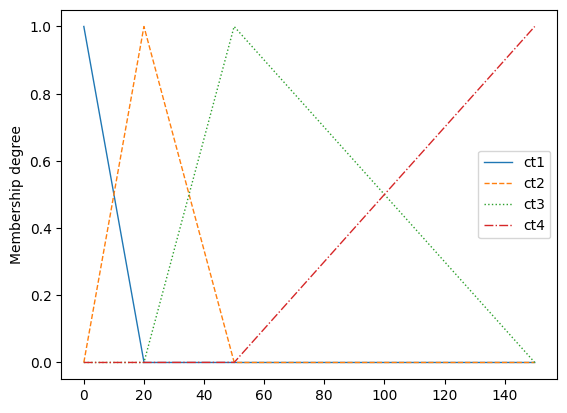

In [2]:
tfs_new_cases = [sf.TriangleFuzzySet(0,0,20, term='ct1'),
sf.TriangleFuzzySet(0,20,50, term='ct2'),
sf.TriangleFuzzySet(20,50,150, term='ct3'),
sf.TriangleFuzzySet(50,150,150, term='ct4'),
]

lv_new_cases = sf.LinguisticVariable(tfs_new_cases,
universe_of_discourse=[0, 150])

FS.add_linguistic_variable("new_cases",
lv_new_cases)

_, ax = plt.subplots()
lv_new_cases.draw(ax)

<Axes: ylabel='Membership degree'>

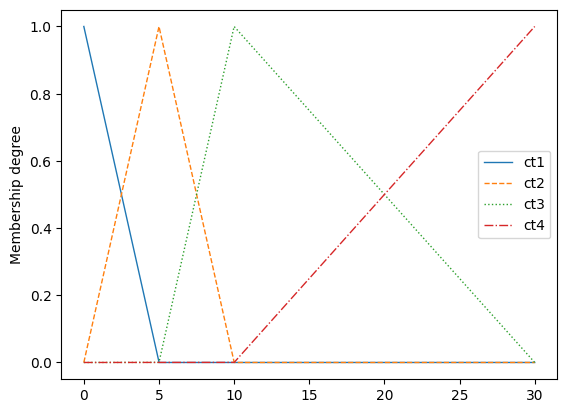

In [3]:
tfs_hospitalization = [sf.TriangleFuzzySet(0,0,5, term='ct1'),
sf.TriangleFuzzySet(0,5,10, term='ct2'),
sf.TriangleFuzzySet(5,10,30, term='ct3'),
sf.TriangleFuzzySet(10,30,30, term='ct4'),
]

lv_hospitalization = sf.LinguisticVariable(tfs_hospitalization,
                                           universe_of_discourse=[0, 30])

FS.add_linguistic_variable("hospitalization_rate",
                           lv_hospitalization
                           )

_, ax = plt.subplots()
lv_hospitalization.draw(ax)

<Axes: ylabel='Membership degree'>

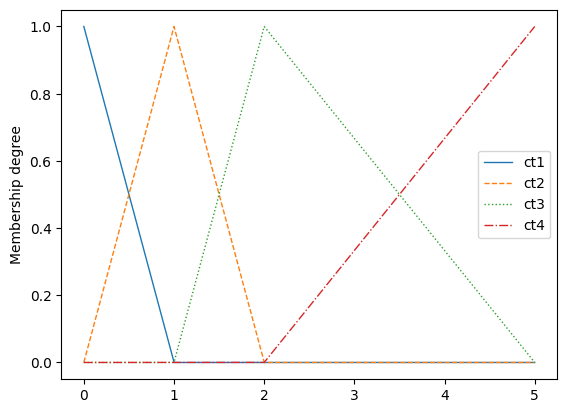

In [4]:
tfs_mortality = [sf.TriangleFuzzySet(0,0,1, term='ct1'),
              sf.TriangleFuzzySet(0,1,2, term='ct2'),
              sf.TriangleFuzzySet(1,2,5, term='ct3'),
              sf.TriangleFuzzySet(2,5,5, term='ct4'),
              ]

lv_mort = sf.LinguisticVariable(tfs_mortality, universe_of_discourse=[0, 5])

FS.add_linguistic_variable("mortality",
                           lv_mort
                           )

_, ax = plt.subplots()
lv_mort.draw(ax)

<Axes: ylabel='Membership degree'>

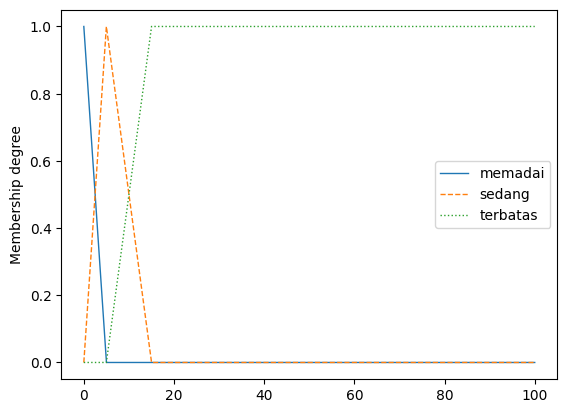

In [5]:
tfs_testing = [sf.TriangleFuzzySet(0, 0, 5, term='memadai'),
               sf.TriangleFuzzySet(0, 5, 15, term='sedang'),
               sf.TrapezoidFuzzySet(5, 15, 100, 100, term='terbatas')
               ]

lv_testing = sf.LinguisticVariable(tfs_testing, universe_of_discourse=[0, 100])

FS.add_linguistic_variable("testing",
                           lv_testing
                           )

_, ax = plt.subplots()
lv_testing.draw(ax)

<Axes: ylabel='Membership degree'>

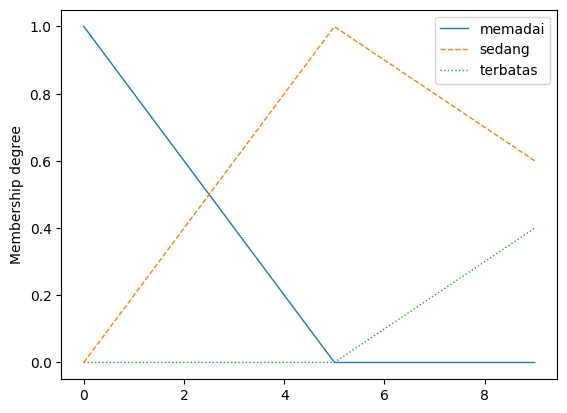

In [6]:
tfs_tracing = [sf.TriangleFuzzySet(5, 9, 9, term='memadai'),
               sf.TriangleFuzzySet(0, 5, 9, term='sedang'),
               sf.TriangleFuzzySet(0, 0, 5, term='terbatas')
               ]

lv_tracing = sf.LinguisticVariable(tfs_testing, universe_of_discourse=[0, 9])

FS.add_linguistic_variable("tracing_ratio",
                           lv_tracing
                           )

_, ax = plt.subplots()
lv_tracing.draw(ax)

<Axes: ylabel='Membership degree'>

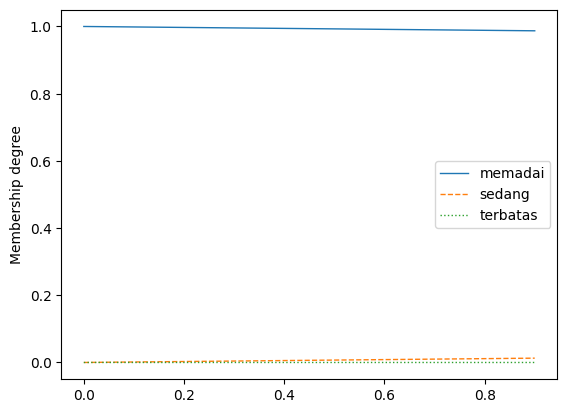

In [7]:
tfs_bor = [sf.TriangleFuzzySet(0, 0, 70, term='memadai'),
           sf.TriangleFuzzySet(0, 70, 90, term='sedang'),
           sf.TrapezoidFuzzySet(70, 90, 100, 100, term='terbatas')
           ]

lv_bor = sf.LinguisticVariable(tfs_bor, universe_of_discourse=[0, 0.9])

FS.add_linguistic_variable("bed_occupancy_rate",
                           lv_bor
                           )

_, ax = plt.subplots()
lv_bor.draw(ax)

<Axes: ylabel='Membership degree'>

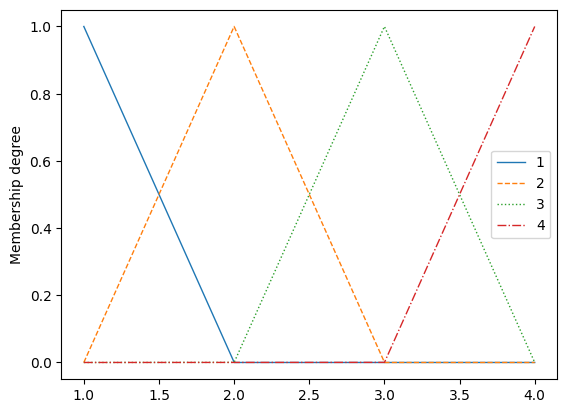

In [8]:
# FS.set_crisp_output_value('1', 1)
# FS.set_crisp_output_value('2', 2)
# FS.set_crisp_output_value('3', 3)
# FS.set_crisp_output_value('4', 4)

ppkm = [
    sf.TriangleFuzzySet(1, 1, 2, term='1'),
    sf.TriangleFuzzySet(1, 2, 3, term='2'),
    sf.TriangleFuzzySet(2, 3, 4, term='3'),
    sf.TriangleFuzzySet(3, 4, 4, term='4')
]

lv_ppkm = sf.LinguisticVariable(ppkm, universe_of_discourse=[1, 4])

FS.add_linguistic_variable(
    "ppkm",
    lv_ppkm
)

_, ax = plt.subplots()
lv_ppkm.draw(ax)

In [9]:
rules = [
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 1)",
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct1) AND (mortality IS ct1) AND (new_cases IS ct1) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct2) AND (mortality IS ct2) AND (new_cases IS ct2) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 2)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct3) AND (mortality IS ct3) AND (new_cases IS ct3) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS memadai) AND (tracing_ratio IS memadai) AND (bed_occupancy_rate IS memadai) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS sedang) AND (tracing_ratio IS sedang) AND (bed_occupancy_rate IS sedang) THEN (ppkm IS 3)",
    "IF (hospitalization_rate IS ct4) AND (mortality IS ct4) AND (new_cases IS ct4) OR (testing IS terbatas) AND (tracing_ratio IS terbatas) AND (bed_occupancy_rate IS terbatas) THEN (ppkm IS 4)",
	]

FS.add_rules(rules)

In [10]:
FS2 = sf.FuzzySystem(show_banner=False)

vaksin = [
    sf.TriangleFuzzySet(50, 100, 100, term='memadai'),
    sf.TriangleFuzzySet(40, 50, 60, term='sedang'),
    sf.TriangleFuzzySet(0, 0, 50, term='terbatas')
]

FS2.add_linguistic_variable(
    "vaksin",
    sf.LinguisticVariable(vaksin, universe_of_discourse=[0, 100])
)

ppkm = [
    sf.TriangleFuzzySet(1, 1, 2, term='1'),
    sf.TriangleFuzzySet(1, 2, 3, term='2'),
    sf.TriangleFuzzySet(2, 3, 4, term='3'),
    sf.TriangleFuzzySet(3, 4, 4, term='4')
]

FS2.add_linguistic_variable(
    "ppkm",
    sf.LinguisticVariable(ppkm, universe_of_discourse=[1, 4])
)

FS2.set_crisp_output_value('1', 1)
FS2.set_crisp_output_value('2', 2)
FS2.set_crisp_output_value('3', 3)
FS2.set_crisp_output_value('4', 4)

rules = [
    "IF (ppkm IS 1) AND (vaksin IS memadai) THEN (output IS 1)",
    "IF (ppkm IS 1) AND (vaksin IS sedang) THEN (output IS 2)",
    "IF (ppkm IS 1) AND (vaksin IS terbatas) THEN (output IS 2)",
    "IF (ppkm IS 2) AND (vaksin IS memadai) THEN (output IS 2)",
    "IF (ppkm IS 2) AND (vaksin IS sedang) THEN (output IS 2)",
    "IF (ppkm IS 2) AND (vaksin IS terbatas) THEN (output IS 3)",
    "IF (ppkm IS 3) AND (vaksin IS memadai) THEN (output IS 2)",
    "IF (ppkm IS 3) AND (vaksin IS sedang) THEN (output IS 3)",
    "IF (ppkm IS 3) AND (vaksin IS terbatas) THEN (output IS 3)",
    "IF (ppkm IS 4) AND (vaksin IS memadai) THEN (output IS 3)",
    "IF (ppkm IS 4) AND (vaksin IS sedang) THEN (output IS 3)",
    "IF (ppkm IS 4) AND (vaksin IS terbatas) THEN (output IS 4)",
]

FS2.add_rules(rules)

 * Detected Sugeno model type


In [13]:
input = {
         'new_cases':0.38,
         'hospitalization_rate':0.77,
         'mortality':0.0,
         'testing':0.86,
         'tracing_ratio':0.0,
         'bed_occupancy_rate':8.85
         }

for label, data in input.items():
    FS.set_variable(label, data)

In [14]:
# output = FS.inference(['ppkm'], verbose=True)
# output = output['ppkm']
output = FS.inference()
output = output['ppkm']
# output = 'PPKM level {}'.format(output)
# print(output)
FS2.set_variable('ppkm', round(output))
FS2.set_variable('vaksin', 91.81)

result = FS2.inference()
result['output']

2.0